## Candiate Number: 251046


# Analytical Work
### Question 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

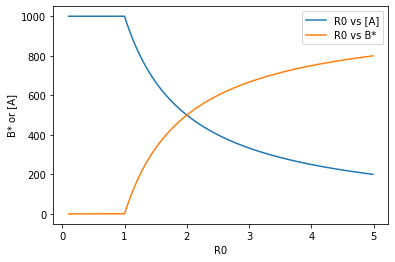

In [3]:
r0=np.arange(0.1, 5.0, 0.01)

# r0 less than 1, stable point is (n,r0)
def neg_point(r0,N=1000):
  return (N,r0)

# r0 greater than 1,stable point is (n/r0,(n-n/r0))
def pos_point(r0,N=1000):
  return (N/r0,N-(N/r0))

equilibria=[]
for i in r0:
  if i<1:
    equilibria.append(neg_point(i))
  else :  
    equilibria.append(pos_point(i))
    
# Plotting the results
plt.xlabel('R0')
plt.ylabel('B*' ' ''or'' ' '[A]')
plt.plot(r0,equilibria)
plt.legend(['R0 vs [A]','R0 vs B*'])
plt.show()

For analysis purpose, Let us consider the non-zero equilibrium point B* in above plot.
System is stable when R0<1 and illustrates how the individuals in **state B** turn into **state A** and population will converge to N=A. 
On the other hand, when R0>1, the system show sign of unstability and N becomes more inclined towards state B, i,e. population will converge to N=B.
Finally, when R0=1, It is in transition state and B* value will be 0.

### Question 5

In [4]:
## expression for B*
def express_Bt(r0,b0,N=1000,gamma=0.5,t=10):
    if r0!=1:
      beta=r0*gamma
      num=(N-(N/r0))
      den=(np.exp(-(beta-gamma)*t))*(((num/b0)-1))+1
      return (num/den)
    else:
        return(0)

x1=[];x2=[];x3=[];x4=[];x5=[];x0=[]
x01=[];x02=[];x03=[];x04=[];x05=[];

bt_r1=[]
for i in r0:
## Time,t =10
  x0.append(express_Bt(i,0)) 
  x1.append(express_Bt(i,1))
  x2.append(express_Bt(i,10))
  x3.append(express_Bt(i,100))
  x4.append(express_Bt(i,500))
  x5.append(express_Bt(i,1000))

## Large Time,t=1000
  x05.append(express_Bt(i,1000,t=1000))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


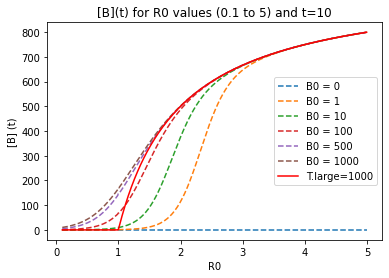

In [5]:
# Plotting the results for B(t) vs R0
plt.figure()
plt.xlabel('R0')
plt.ylabel('[B] (t)')

plt.plot (r0,x0,label="B0 = 0",linestyle="dashed")
plt.plot (r0,x1,label="B0 = 1",linestyle="dashed")
plt.plot (r0,x2,label="B0 = 10",linestyle="dashed")
plt.plot (r0,x3,label="B0 = 100",linestyle="dashed")
plt.plot (r0,x4,label="B0 = 500",linestyle="dashed")
plt.plot (r0,x5,label="B0 = 1000",linestyle="dashed")
plt.plot(r0,x05,'r-',markersize=1,label="T.large=1000")

plt.title("[B](t) for R0 values (0.1 to 5) and t=10")
plt.legend()
plt.show()


In the above graph, we have taken values of B0 between 1 and N = 1000 to plot solutions of [B] (t) with R0 between 0.1 and 5.0 and γ = 0.5.
In case of B0=0, we can see that all the solutions tend to be 0 and hence stable.  
a.) Obtained expression for [B] (t) is verified above by plotting large T value(1000) which converges as shown in red line, meaning all initial populations B0 convergence towards B* when the time is large enough.

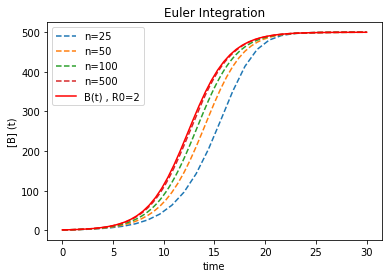

In [6]:
# integrating the mean-field equation
def mean_field(B0,r0=2,N=1000,gamma=0.5):
    return (((r0*gamma)*(B0/N)*(N-B0))-(gamma*B0)) 

plt.figure()
plt.xlabel('time')
plt.ylabel('[B] (t)')
bt=[]; 

## Euler method for integration 
def euler(func,b0,T,N):
# solve b0'= f(b0,t), b0 with n steps until T
  time=np.zeros(n+1)
  der= np.zeros(n+1)
  der[0]= b0
  time[0]=0
  dt=T/n
 
  for i in range(n):
    time[i+1]= time[i]+dt
    der[i+1]= der[i] + dt * func(der[i])
    
  return time,der

if __name__ == "__main__": 
    for n in [25,50,100,500]:           
      der,time= euler(mean_field, b0=1, T=30,N=n)
      plt.plot(der,time,linestyle="dashed",label=f"n={n}")
bt_r1=[]    
for j in np.linspace(0,30,50) :
  bt.append(express_Bt(r0=2,b0=1,t=j))

plt.plot(np.linspace(0,30,50),bt,'r-',label="B(t) , R0=2")


plt.title("Euler Integration")
plt.legend()
plt.show()

b.) In above graph, we integrated the mean-field equation using Euler method and notice that it agrees with earlier solutions for B(t). Also,with increase in number of steps, we see that the euler solution converges to the value of large B(t).

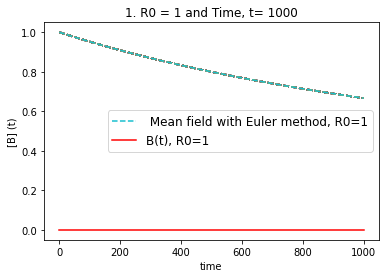

In [7]:
## for r0=1 and t=1000
bt_r1=[]
def mean_field1(B0,r0=1,N=1000,gamma=0.5):
    return (((r0*gamma)*(B0/N)*(N-B0))-(gamma*B0)) 

for j in np.linspace(0,1000,100) :
    u,t= euler(mean_field1, b0=1, T=1000,N=n)
    plt.plot(u,t,linestyle="dashed",label=" Mean field with Euler method, R0=1")   
    bt_r1.append(express_Bt(r0=1,b0=1,t=j))

plt.plot(np.linspace(0,1000,100),bt_r1,'r-',label="B(t), R0=1")
plt.xlabel('time')
plt.ylabel('[B] (t)')
plt.title("1. R0 = 1 and Time, t= 1000")
#getting rid of duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),prop={'size': 12},loc=5)
plt.show()

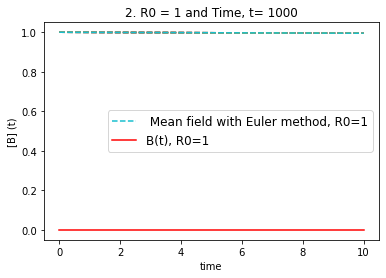

In [8]:
## for r0=1 and t=10
bt_r1=[]
def mean_field1(B0,r0=1,N=1000,gamma=0.5):
    return (((r0*gamma)*(B0/N)*(N-B0))-(gamma*B0)) 

for j in np.linspace(0,10,10) :
    u,t= euler(mean_field1, b0=1, T=10,N=n)
    plt.plot(u,t,linestyle="dashed",label=" Mean field with Euler method, R0=1")
    
    bt_r1.append(express_Bt(r0=1,b0=1,t=j))

plt.plot(np.linspace(0,10,10),bt_r1,'r-',label="B(t), R0=1")
plt.xlabel('time')
plt.ylabel('[B] (t)')
plt.title("2. R0 = 1 and Time, t= 1000")
#getting rid of duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),prop={'size': 12},loc=5)
plt.show()

When R0 = 1, Expression for B(t) becomes 0 as beta becomes equal to gamma and hence will be a zero equilibrium case. From the above two graphs, we can realize that B(t) will infact reach 0, when the time interval is really big.
Also, value of γ is inversely proportional to R0. Hence, any increase in γ would result in decrease of beta and vice-versa. 

# Simulation Work

In [9]:
from random import expovariate # Generate variates from exponential distribution
import numpy as np
import matplotlib.pyplot as plt


def gillespie_ABA(N,B0,beta,gamma,Tmax):

    A=[N-B0] # We cannot predict how many elements there will be unfortunately
    B=[B0]
    T=[0] 
    state = np.random.permutation([0]*(N-B0)+[1]*B0) # Randomly allocate B0 individuals to have state B (state=1), A (state=0) otherwise 
    B_contacts = np.where(state==1)[0] # Index of individuals in state B (state=1).
    rate_vector = B0*beta*np.ones((N,1))/N # Set rates to be B0*beta/N (rate for individuals in state A) to all individuals (initialisation). 
    rate_vector[B_contacts] = gamma # Update rate of B_contacts to be gamma (the rate for individuals in state B)
    
    time = 0
    while time<=Tmax+0.5: # some (arbitrary) buffer after Tmax
        rate = np.sum(rate_vector) # Total rate (refer to Gillespie algorithm for details)
        cumrate = np.cumsum(rate_vector) # Cumulated sum of rates
        if rate > 0.000001: # if rate is sufficiently large
            tstep = expovariate(rate) # Pick an exponentially distributed time. Beware of difference with exprnd in Matlab where it is 1/rate
            T.append(T[-1]+tstep) # Time of next event
            event = np.where(cumrate>np.random.rand()*rate)[0][0] # Find which individual will see its state change 
            if state[event]==0: # individual is in state A 
                A.append(A[-1]-1) # this state A individual becomes state B so number of state A individuals is decreased
                B.append(B[-1]+1) # obviously, number of state B individuals is increased 
                state[event] = 1 # Update state vector
                rate_vector[event] = gamma # Change rate of individual to B->A rate, namely gamma
                A_contacts = np.where(state==0)[0] # List of state A individuals after change
                rate_vector[A_contacts] += beta/N # Update rate of state A individuals to account for the extra state B individual
            else: # individual is in state B
                B.append(B[-1]-1) # this state B individual becomes state A so number of state B individuals is decreased
                A.append(A[-1]+1) # obviously, number of state A individuals is increased
                state[event] = 0 # Update state vector
                A_contacts = np.where(state==0)[0] # List of state A individuals after changes                                
                rate_vector[A_contacts] = beta*len(np.where(state==1)[0])/N # Update rate of state A individuals based on number of B individuals  
        else: # Nothing will happen from now on so we can accelerate the process
            time = T[-1] # current time
            while time <= Tmax + 0.5:
                A.append(A[-1]) # Just keep things as they are
                B.append(B[-1])
                T.append(T[-1]+0.5) # arbitrarily add 0.5 to clock
                time = T[-1]
        # Update time and proceed with loop 
        time = T[-1]         

    return T,A,B    

### Question 1

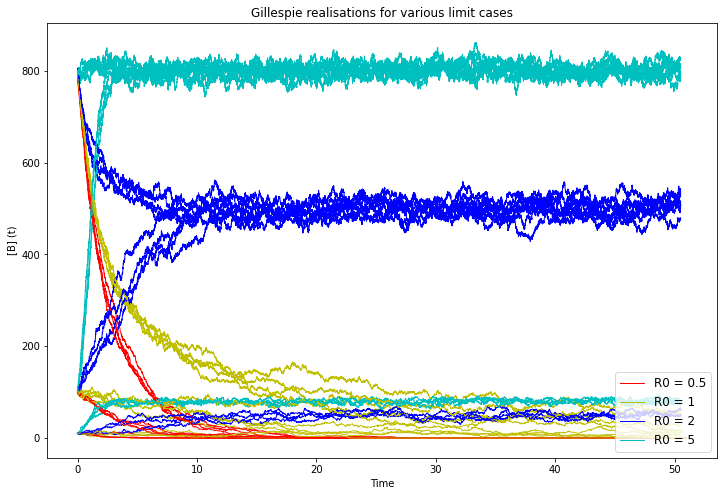

In [10]:
## plotting gillespie for various realisations
plt.figure(figsize=(12,8))
### initial parmeter setup
gamma=0.5
R0=[0.5,1,2,5]; N=[100,1000];
colors = ['r', 'y', 'b', 'c', 'k', 'm','g']
### running gillespie algorith multiple times
for gill in range (1,5):
  for i,r in enumerate(R0):  
    for n in N:      
      if n==1000:
        B0=[800,100]
      else:
        B0=[10]
      for b in B0:
        Ts,As,Bs = gillespie_ABA (N=n,B0=b,gamma=0.5,beta=r*gamma,Tmax=50)
        plt.plot(Ts, Bs,colors[i],linewidth=1,label='R0 = '+ str(R0[i]))
      
plt.xlabel("Time")
plt.ylabel("[B] (t)")

#getting rid of duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),prop={'size': 12},loc=4)
plt.title("Gillespie realisations for various limit cases")
plt.show()


Limit case scenarios is as below :

    *  Small : R0 = 0.5, N = 100,  B = 10
    *  Large : R0 = 5 , N= 1000, B= 800
    *  Intermediate : R0 = 2 , B= 80  
    

Various realisations of the stochastic process is shown in above plot.
Firstly, we look at the effect of R0 on [B] with a range of values from 0.5 to 5. We observe that the equilibrium of the system clearly depends on R0. 
R0 being bigger or lower than 1 is the threshold. As stated previously in the analytical part, if R0<1 there is equilibrium will be at point $(N,0)$ and when R0>1,the system will reach  point $( N/R0,N-(N/R0))$.

If RO < 1, the B population tends to settle down in equilibrium despite of the variation obtained due to the stochasticity of the process. RED in the above plots represents RO < 1.

However, when R0 > 1, the behaviour of the system will stablize at non zero equilibrium as stated above, illustrated by BLUE and CYAN lines, it undergoes an exponential decay. 

Finally, when R0=1, the behaviour is shown in plot as YELLOW. It tends to settle down to a stable equilibrium as [B] tends to be 0 with large time.When [B]=0 is reached, there is stability since it is the stable equilibrium previously obtained.


With large N, we notice that the plots shows clear stable behaviour and the exponential decay is clearly visible. In initial plots, small N is considered and the decay is unclear and the observations becomes cluttered.




Most initial populations B0, converges to a stable point determined by the B* equilibrium with N=1000 or 100 and also various R0 values.Irrespective of B0 values, system reaches stable point (provided B0 > 1) over large time period.

## Question 2

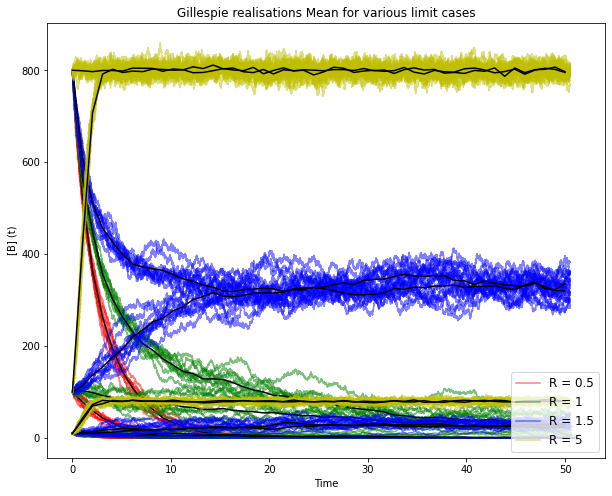

In [11]:
from scipy import interpolate
### initial parameter setup
r0=[0.5,1,1.5,5]
N =[100,1000]
gamma = 0.5
colors=['r', 'g', 'b', 'y', 'm', 'k', 'c']
plt.figure(figsize=(10,8))
k=0

for r in r0:
    for n in N:
        inter_a_large=[]
        inter_b_small=[]
        for i in range(10):
          if n==1000:
            b=[800,100]
          else:
            b=[10,10]
## interpolating the results from gillespie after multiple runs
          Ts, As,Bs = gillespie_ABA(n,b[0],r*gamma,gamma,50)
          inter_a_large.append(interpolate.interp1d(Ts,Bs))
          plt.plot(Ts,Bs,colors[k],alpha=.5,label='R = '+ str(r))
           
          Ts, As,Bs = gillespie_ABA(n,b[1],r*gamma,gamma,50)
          inter_b_small.append(interpolate.interp1d(Ts,Bs))
          plt.plot(Ts,Bs,colors[k],alpha=.5,label='R = '+ str(r))

### large B0 value
        b0_list_large=[]
        times=np.linspace(0,50,50)
        for ints_a in inter_a_large:
            b0_list_large.append(ints_a(times))
## calculating the average and standard deviation        
        avg_b=[] ; stdev_b=[]      
        for i in range(len(times)):
          sum_b=[]
          for j in b0_list_large:
            sum_b.append(j[i])
          avg_b.append(np.mean(sum_b))
          stdev_b.append(np.std(sum_b))
        plt.plot(times,avg_b,'k',linewidth=1.5) 

# small B0 value
        b0_list_small=[]
        for ints_b in inter_b_small:
            b0_list_small.append(ints_b(times))
## calculating the average and standard deviation
        avg_b=[] ; stdev_b =[]
        for i in range(len(times)):
          sum_b=[]
          for j in b0_list_small:
            sum_b.append(j[i])
          avg_b.append(np.mean(sum_b))
          stdev_b.append(np.std(sum_b))
        plt.plot(times,avg_b,'k',linewidth=1.5) 
    k=k+1

plt.xlabel("Time")
plt.ylabel("[B] (t)")
#getting rid of duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),prop={'size': 12},loc=4)
plt.title("Gillespie realisations Mean for various limit cases")
plt.show()


For each limit case scenarios, average of various realisations is shown above. Now, we plot the standard deviation and error bars for the same. While calculating the mean for each realisations, we faced a challenge of missing B values while running the Gillespie algorithm. This missing values was due to the random distribution of time which is considered by the algorithm. This challenge was overcome by taking 1 dimensional interpolation using the scipy interpolation function.


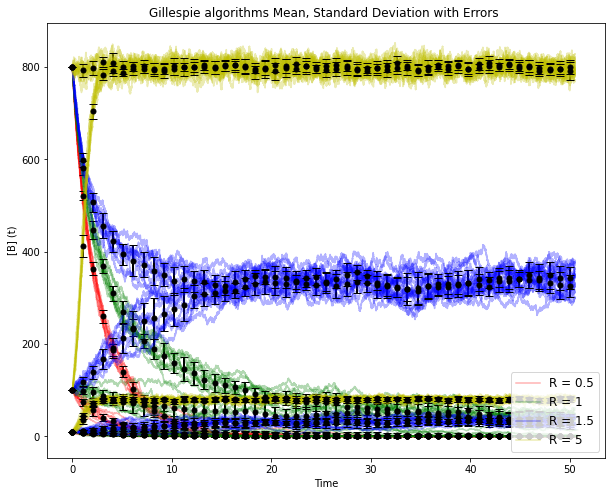

In [12]:
from scipy import interpolate
r0=[0.5,1,1.5,5]
N =[100,1000]
gamma = 0.5
colors=['r', 'g', 'b', 'y', 'm', 'k', 'c']
plt.figure(figsize=(10,8))
k=0

for r in r0:
    for n in N:
        inter_a_large=[]
        inter_b_small=[]
        
        for i in range(10):
          if n==1000:
            b=[800,100]
          else:
            b=[10,10]
## interpolating the results from gillespie after multiple runs
          Ts, As,Bs = gillespie_ABA(n,b[0],r*gamma,gamma,50)
          inter_a_large.append(interpolate.interp1d(Ts,Bs))
          plt.plot(Ts,Bs,colors[k],alpha=.3,label='R = '+ str(r))
            
          Ts, As,Bs = gillespie_ABA(n,b[1],r*gamma,gamma,50)
          inter_b_small.append(interpolate.interp1d(Ts,Bs))
          plt.plot(Ts,Bs,colors[k],alpha=.3,label='R = '+ str(r))
          
### large B0 value
        b0_list_large=[]
        times=np.linspace(0,50,50)
        for ints_a in inter_a_large:
            b0_list_large.append(ints_a(times))
## calculating the average and standard deviation       
        avg_b=[] ; stdev_b=[]      
        for i in range(len(times)):
          sum_b=[]
          for j in b0_list_large:
            sum_b.append(j[i])
          avg_b.append(np.mean(sum_b))
          stdev_b.append(np.std(sum_b))

        #plt.plot(times,avg_b,'crimson',linewidth=2)
        plt.errorbar(times,avg_b,yerr=stdev_b,color='black', fmt='.', markersize='10', ecolor='black',capsize=4, elinewidth=2)

# small b0 value
        b0_list_small=[]
        for ints_b in inter_b_small:
            b0_list_small.append(ints_b(times))
## calculating the average and standard deviation
        avg_b=[] ; stdev_b =[]
        for i in range(len(times)):
          sum_b=[]
          for j in b0_list_small:
            sum_b.append(j[i])
          avg_b.append(np.mean(sum_b))
          stdev_b.append(np.std(sum_b))

        #plt.plot(times,avg_b,'crimson',linewidth=2)
        plt.errorbar(times,avg_b,yerr=stdev_b,color='black', fmt='.', markersize='10', ecolor='black',capsize=4, elinewidth=2)
          
    k=k+1
    
plt.xlabel("Time")
plt.ylabel("[B] (t)")

#getting rid of duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),prop={'size': 12},loc=4)

plt.title("Gillespie algorithms Mean, Standard Deviation with Errors ")
plt.show()

Above, we see that as the initial population ([B]) gets bigger, standard deviation becomes larger. On the contrary, with smaller [B], the standard deviation gets closer to the mean of all realisations.
Also, as the population N increases, the standard deviation becomes smaller and the results seems to be less noisy.
On contrary, inverse is true for RO when compared with N. As R0 increase, we notice that the errors also follow the trend.


## Question 3

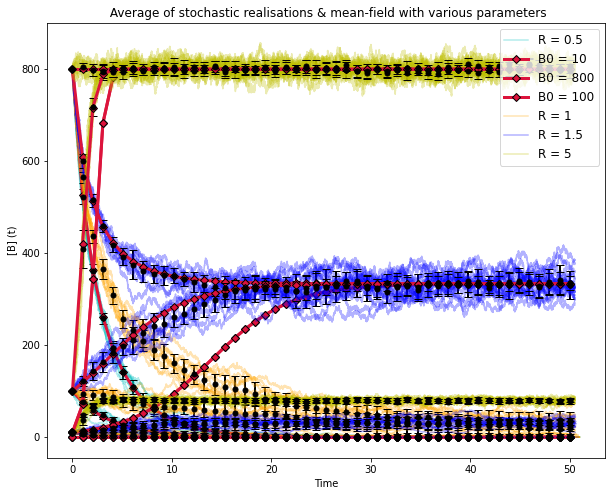

In [13]:

r0=[0.5,1,1.5,5]
N =[100,1000]
gamma = 0.5
colors=['c', 'orange', 'b', 'y', 'm', 'k', 'c']
plt.figure(figsize=(10,8))
k=0

for r in r0:
    for n in N:
        inter_a_large=[]
        inter_b_small=[]
        
        for i in range(10):
          if n==1000:
            b=[800,100]
          else:
            b=[10,10]
## interpolating the results from gillespie after multiple runs
          Ts, As,Bs = gillespie_ABA(n,b[0],r*gamma,gamma,50)
          inter_a_large.append(interpolate.interp1d(Ts,Bs))
          plt.plot(Ts,Bs,colors[k],alpha=.3,label='R = '+ str(r))
            
          Ts, As,Bs = gillespie_ABA(n,b[1],r*gamma,gamma,50)
          inter_b_small.append(interpolate.interp1d(Ts,Bs))
          plt.plot(Ts,Bs,colors[k],alpha=.3,label='R = '+ str(r))
          
### large B0 value
        b0_list_large=[]
        times=np.linspace(0,50,50)
        for ints_a in inter_a_large:
            b0_list_large.append(ints_a(times))
## calculating the average and standard deviation      
        avg_b=[] ; stdev_b=[]      
        for i in range(len(times)):
          sum_b=[]
          for j in b0_list_large:
            sum_b.append(j[i])
          avg_b.append(np.mean(sum_b))
          stdev_b.append(np.std(sum_b))

        #plt.plot(times,avg_b,'crimson',linewidth=2)
        plt.errorbar(times,avg_b,yerr=stdev_b,color='black', fmt='.', markersize='10', ecolor='black',capsize=4, elinewidth=2)
      
        x2_high=[]
        for j in times :
          x2_high.append(express_Bt(r0=r,b0=b[0],t=j))
        plt.plot(times,x2_high,color='crimson',marker='D', markeredgecolor='black',linewidth=3.0,label='B0 = '+ str(b[0]))

# small b0 value
        b0_list_small=[]
        for ints_b in inter_b_small:
            b0_list_small.append(ints_b(times))
## calculating the average and standard deviation
        avg_b=[] ; stdev_b =[]
        for i in range(len(times)):
          sum_b=[]
          for j in b0_list_small:
            sum_b.append(j[i])
          avg_b.append(np.mean(sum_b))
          stdev_b.append(np.std(sum_b))

        #plt.plot(times,avg_b,'crimson',linewidth=2)
        plt.errorbar(times,avg_b,yerr=stdev_b,color='black', fmt='.', markersize='10', ecolor='black',capsize=4, elinewidth=2)
        
        x2_low=[]
        for j in times :
          x2_low.append(express_Bt(r0=r,b0=b[1],t=j))
        plt.plot(times,x2_low,color='crimson',marker='D', markeredgecolor='black',linewidth=3.0,label='B0 = '+ str(b[1]))    
    k=k+1
    
plt.xlabel("Time")
plt.ylabel("[B] (t)")

#getting rid of duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),prop={'size': 12},loc=1)

plt.title(" Average of stochastic realisations & mean-field with various parameters")
plt.show()

When B reaches equilibrium, the rate of changes stabilizes and remains approximately constant (there is always some noisy due to the stochasticity of the process). We see agreement between average of stochastic realisations and mean-field in relation in most cases. Mean field is plotted in RED for easy visibility.

Depending on R0 value and the initial population, the equilibrium might not be reached, and thus, the mean field equation might not converge to zero (mostly when R0 >1).



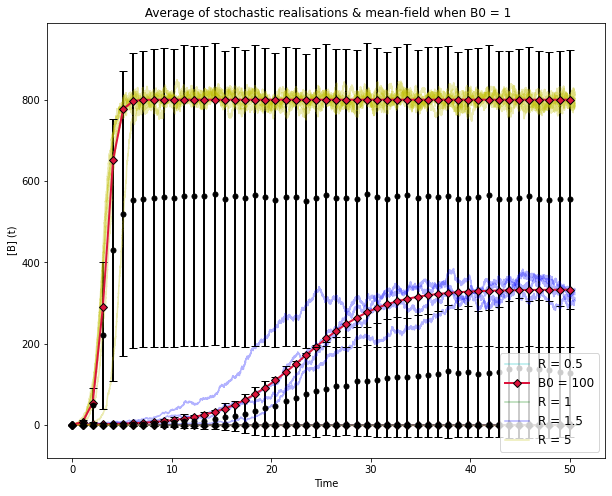

In [14]:

r0=[0.5,1,1.5,5]
N =[1000]
#gamma = 0.5
colors=['c', 'g', 'b', 'y', 'm', 'k', 'c']
plt.figure(figsize=(10,8))
k=0

for r in r0:
    for n in N:
        inter_a=[]
        for i in range(10):
## interpolating the results from gillespie after multiple runs        
          Ts, As,Bs = gillespie_ABA(n,1,r*gamma,0.5,50)
          inter_a.append(interpolate.interp1d(Ts,Bs))
          plt.plot(Ts,Bs,colors[k],alpha=.3,label='R = '+ str(r))
 
## unity b0 value
        b0_list=[]
        times=np.linspace(0,50,50)
        
        for ints_a in inter_a:
            b0_list.append(ints_a(times))
## calculating the average and standard deviation
        avg_a=[] ; stdev_a =[]
        for i in range(len(times)):
          sum_a=[]
          for j in b0_list:
            sum_a.append(j[i])
          avg_a.append(np.mean(sum_a))
          stdev_a.append(np.std(sum_a))

        #plt.plot(times,avg_a,'crimson',linewidth=2)
        plt.errorbar(times,avg_a ,yerr=stdev_a,color='black', fmt='.', markersize='10', ecolor='black',capsize=4, elinewidth=2)      
        x2=[]
        for j in times :
          x2.append(express_Bt(r0=r,b0=1,t=j))
        plt.plot(times,x2,color='crimson',marker='D', markeredgecolor='black',linewidth=2.0,label='B0 = '+ str(b[1]))
        
    k=k+1

plt.xlabel("Time")
plt.ylabel("[B] (t)")

#getting rid of duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),prop={'size': 12},loc=4)
plt.title(" Average of stochastic realisations & mean-field when B0 = 1")
plt.show()

In case of B0 = 1, we can get a clearer picture about what is happening in the system.
We see that, the average of stochastic realisations is always lesser than our mean-field.
Here, mean field is represented by RED and the average is shown in BLACK. As expected, the error rates are more when the R0 values are higher.

## Question 4

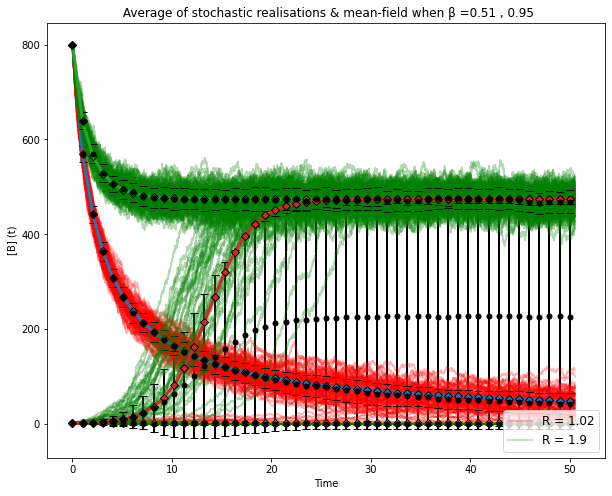

In [15]:

r0=[1.02,1.9]
N =[1000]
gamma = 0.5
colors=['r', 'g', 'b', 'y', 'm', 'k', 'c']
plt.figure(figsize=(10,8))
k=0
b=[800,1]

for r in r0:
    for n in N:
        inter_a_large=[]
        inter_b_small=[]
    
        for i in range(100):
## interpolating the results from gillespie after multiple runs 
          Ts, As,Bs = gillespie_ABA(n,b[0],r*gamma,gamma,50)
          inter_a_large.append(interpolate.interp1d(Ts,Bs))
          plt.plot(Ts,Bs,colors[k],alpha=.3,label='R = '+ str(r))
            
          Ts, As,Bs = gillespie_ABA(n,b[1],r*gamma,gamma,50)
          inter_b_small.append(interpolate.interp1d(Ts,Bs))
          plt.plot(Ts,Bs,colors[k],alpha=.3,label='R = '+ str(r))
          

### large B0 value
        b0_list_large=[]
        times=np.linspace(0,50,50)
        for ints_a in inter_a_large:
            b0_list_large.append(ints_a(times))
## calculating the average and standard deviation        
        avg_b=[] ; stdev_b=[]      
        for i in range(len(times)):
          sum_b=[]
          for j in b0_list_large:
            sum_b.append(j[i])
          avg_b.append(np.mean(sum_b))
          stdev_b.append(np.std(sum_b))

        #plt.plot(times,avg_b,'crimson',linewidth=2)
        plt.errorbar(times,avg_b,yerr=stdev_b,color='black', fmt='.', markersize='10', ecolor='black',capsize=4, elinewidth=2)
      
        x2_high=[]
        for j in times :
          x2_high.append(express_Bt(r0=r,b0=b[0],t=j))
        plt.plot(times,x2_high,marker='D', markeredgecolor='black',linewidth=3.0)

# small b0 value
        b0_list_small=[]
        for ints_b in inter_b_small:
            b0_list_small.append(ints_b(times))
## calculating the average and standard deviation
        avg_b=[] ; stdev_b =[]
        for i in range(len(times)):
          sum_b=[]
          for j in b0_list_small:
            sum_b.append(j[i])
          avg_b.append(np.mean(sum_b))
          stdev_b.append(np.std(sum_b))

        #plt.plot(times,avg_b,'crimson',linewidth=2)
        plt.errorbar(times,avg_b,yerr=stdev_b,color='black', fmt='.', markersize='10', ecolor='black',capsize=4, elinewidth=2)
        
        x2_low=[]
        for j in times :
          x2_low.append(express_Bt(r0=r,b0=b[1],t=j))
        plt.plot(times,x2_low,marker='D', markeredgecolor='black',linewidth=3.0)    
    k=k+1

plt.xlabel("Time")
plt.ylabel("[B] (t)")

#getting rid of duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),prop={'size': 12},loc=4)
plt.title(" Average of stochastic realisations & mean-field when β =0.51 , 0.95")
plt.show()

We see a substantial difference in agreement between mean-field and average of the stochastic realisations on the second scenario (shown in GREEN), which is when R0 is 1.9.

In the first scenario (shown in RED) of R0=1.02, we see that both mean field and average of realisations are in agreement.
We could improve agreement for the scenario by increasing the B0 value, as with higher B0 values, we are seeing an agreement between mean-field and average of realisations.
When B0 value is 1, it might tends to settle with zero members in B state and it cannot recover once it reach 0.

When R0 is close to 1, it reaches zero equilibrium and the mean and error will be close to the zero equilibrium as shown in above graph. Once R0 becomes bigger (R0>1), the error value will also be higher as it moves away from non-zero equilibrium, making it more appealing.

# Critical thinking

## Question 1

The given ODE is a classic example of SIS Epidemic Model. We can consider a real world scenario of COVID as an example for applying our Model. **Susceptible – Infected – Susceptible** Model include susceptibles *S*, who may get the disease and the infected *I*, who gets infected and transmits the disease to susceptible. In the example of COVID, an individual gets **infected** and may spread the virus to whomsoever in contact (susceptibles) and when recovered, becomes susceptible once again.

In the given system, *Susceptible is [A]* and *Infected is [B]* and the susceptible become infected at rate β while infected recover at rate γ. The population consisits of Susceptibles+Infected,i.e N=S+I or [A] + [B].Basic reproduction ratio is denoted by R0 and is a major factor to study any epidemic and is given by β/γ.   
If R0 > 1, then the epidemic is supercritical and grows exponentially and, if R0 < 1, then the epidemic is subcritical and shrinks exponentially. If the recovery rate γ=0, then R0 = ∞, meaning that there is no threshold (R0=1) and eventually everyone is infected.


In Epidemiology, mathematical models are used to describe vital effects of any disease in some population. Various parameters are estimated from the model for comparing the necessary vaccination levels for attaining herd immunity(especially for diseases like COVID).

**Critical regime :**
In case of critical regime, R0 = 1 and this is a specical case of endemic. Ratio of a population that needs to be immune for any infectious disease to become stable in the prevailing community is known as herd immunity threshold. If this is reached by any means like immunisation (via vaccination), then each infected leads only to a single new infection (R=1) and the infection will become stable within the given population.



## Question 2

Given algorithm assume homogeneous mixing of any given population, which might be an good estimate for small communities. However, while considering spread of disease at a national or international level, the model fails to capture the effect of mix of heterogeneities. For instance, travel patterns and population distributions (ethnicity) contribute heavily towards the spread of disease.
The given algorithm's limitation could be overcome by focusing on interactions between individuals (or populations) for example, how and where the spreading process is concentrated and tracing contacts in the network. We could use node-to-node contacts at a particular time, which can be represented by an **adjacency matrix**. 

In real world scenario, all the individuals in population will never be in contact with each other. For example, let us consider a population of 10,000 in a town. There cannot be an instance where all 10,000 are in contact with each other. Out of population, the contact would be 1000 at max (as an example). i.e. the rest of the population is being isolated from the infected. This is the reason why, COVID positive subjects are made to isolate till the transmission period is over. If one infected person is in contact with non-infected person, it could mean that the chain reactions could lead to other 1000 individuals inside the population.

In our Gillespie algorithm, we presume that all individuals are potentially in contact with each other. Another limitation of the algorithm is it's randomness, meaning that it randomly assigns individuals to state A and B with respect to time. Hence, it comes under probabilistic model. We could also try for a deterministic model for satisfying the heterogenous condition. i.e. every individual is not in contact with each other.